In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [61]:
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
person_rand = [0.4997632, 0.53151315, 0.4953193, 0.48565182, 0.51492274, 0.50330985, 0.47631958, 0.5]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
face_rand = [0.50652635, 0.49794447, 0.6964292, 0.5, 0.57799053, 0.4734094, 0.5340897, 0.5132827]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
animal_rand = [0.490, 0.518, 0.467, 0.506, 0.492, 0.492, 0.490, 0.460]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
vehicle_rand = [0.51243365, 0.46709448, 0.5088834, 0.5, 0.4573095, 0.5398707, 0.5137987, 0.5396303]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
outdoor_rand = [0.4352548, 0.47683832, 0.54090405, 0.4749565, 0.50131303, 0.49639726, 0.45271426, 0.3698519]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
sports_rand = [0.4761905, 0.5304762, 0.50676864, 0.5143444, 0.50541246, 0.5006824, 0.4957806, 0.49680126]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
food_rand = [0.4390853, 0.54637724, 0.5690207, 0.49045455, 0.5523299, 0.5573561, 0.48547196, 0.44132835]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
furniture_rand = [0.5313172, 0.49489248, 0.47832003, 0.49440512, 0.42427492, 0.56255865, 0.52089465, 0.49288598]

In [62]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [63]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names):
    plt.rc('font', size=15)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.5, ecolor='black', capsize=14, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.5, ecolor='black', capsize=14, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title('AUC of Different Categories')
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'])
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [64]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)

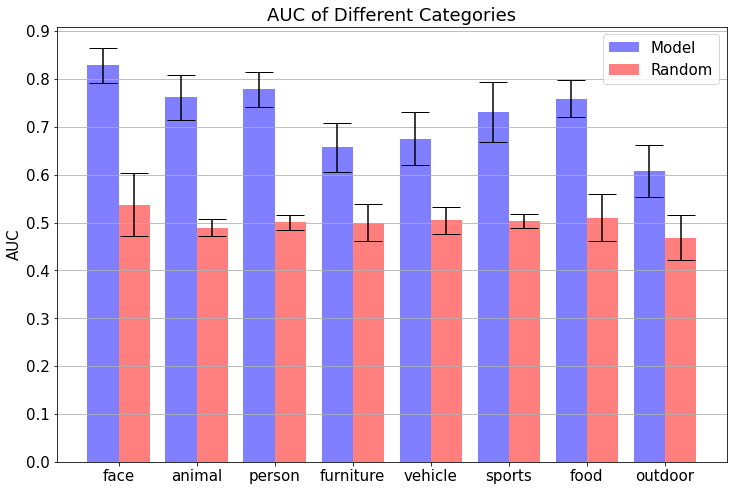

In [65]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand, vehicle_rand, sports_rand, food_rand, outdoor_rand]
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [66]:
ttest(names, categories, categories_rand)

face :
t-statistic: 10.11598979645343 p-value: 4.048212655325941e-08
animal :
t-statistic: 14.485996688747932 p-value: 4.0327720375866824e-10
person :
t-statistic: 18.272385980721282 p-value: 1.8229482953080907e-11
furniture :
t-statistic: 6.424601156575583 p-value: 7.940906584404202e-06
vehicle :
t-statistic: 7.301613495177112 p-value: 1.9499300348921045e-06
sports :
t-statistic: 9.325960202953269 p-value: 1.1007113032725453e-07
food :
t-statistic: 10.48336492617673 p-value: 2.5948253991602724e-08
outdoor :
t-statistic: 5.123433637760139 p-value: 7.743513102378257e-05
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [3.23857012e-07 3.22621763e-09 1.45835864e-10 6.35272527e-05
 1.55994403e-05 8.80569043e-07 2.07586032e-07 6.19481048e-04]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [8.09642531e-08 1.61310882e-09 1.45835864e-10 9.07532181e-06
 2.59990671e-06 1.76113809e-07 6.91953440e-08 7.74351310

In [67]:
vehicle_fine = [[0.6155303, 0.5373244, 0.49680173, 0.7786325, 0.48484847, 0.72578126, 0.4918033, 0.7942029],
                [0.6666667, 0.50619197, 0.6929637, 0.7564655, 0.6268939, 0.6904761, 0.5107345, 0.5511905],
                [0.31628788, 0.7, 0.4308712, 0.6657197, 0.57350427, 0.60966814, 0.4369048, 0.6197691],
                [0.5164319, 0.5957132, 0.509375, 0.58869046, 0.68145156, 0.6240981, 0.58701146, 0.56396586],
                [0.61626345, 0.607531, 0.79565215, 0.49260747, 0.6393162, 0.6343001, 0.5515996, 0.67377394],
                [0.39999998, 0.604968, 0.61025643, 0.78809524, 0.36886996, 0.7546874, 0.49921876, 0.5948827],
                [0.5906184, 0.63586956, 0.46908316, 0.8651961, 0.60598296, 0.7338709, 0.26119405, 0.5094017],
                [0.5833333, 0.59090906, 0.4, 0.5625, 0.6666666, 0.6985294, 0.42708334, 0.68773943]]
vehicle_fine_rand = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                     [0.5, 0.5, 0.5, 0.49242425, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                     [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                     [0.5, 0.47903726, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]
animal_fine = [[0.7154605, 0.60125595, 0.69484496, 0.55034727, 0.7777778, 0.44920632, 0.4520631, 0.57211, 0.66746, 0.429906],
               [0.71895427, 0.64504945, 0.6796993, 0.621566, 0.479798, 0.6230159, 0.4510417, 0.45794392, 0.47227722, 0.5985839],
               [0.65306133, 0.53178966, 0.56228435, 0.42380953, 0.96363634, 0.50849056, 0.345, 0.9409091, 0.6067961, 0.6322917],
               [0.5821429, 0.48584908, 0.6357833, 0.5373832, 0.29816514, 0.42056075, 0.30873013, 0.439252, 0.548474, 0.614695],
               [0.7368422, 0.52318186, 0.61303866, 0.7293957, 0.4706349, 0.55013746, 0.4019608, 0.83878505, 0.56644, 0.706971],
               [0.63136363, 0.4471154, 0.5573944, 0.6771979, 0.57539684, 0.67513746, 0.49514565, 0.4857143, 0.575000, 0.756363],
               [0.56006944, 0.43627447, 0.6130319, 0.576415, 0.58571434, 0.5525701, 0.6518692, 0.6995413, 0.57623, 0.60681],
               [0.50667715, 0.537037, 0.5116133, 0.58630955, 0.48518524, 0.5083334, 0.60028857, 0.9529412, 0.414634, 0.47302]]
animal_fine_rand = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49541, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]
food_fine = [[0.68437505, 0.4408602, 0.40000004, 0.6269842, 0.63750005, 0.6893939, 0.0, 0.74375, 0.5681818, 0.3857143],
             [0.4625, 0.67857146, 0.52272725, 0.87619054, 0.67647064, 0.2647059, 0.49242425, 0.51881725, 0.3010753, 0.6022726],
             [0.528125, 0.3198925, 0.52150536, 0.43010756, 0.6271552, 0.5119048, 0.59803927, 0.63095236, 0.2647059, 0.3333333],
             [0.88257575, 0.516129, 0.6212121, 0.6854838, 0.6293706, 0.2876344, 0.50980395, 0.69117653, 0.5882354, 0.5734127],
             [0.47407407, 0.69892466, 0.42142856, 0.506993, 0.653125, 0.39285713, 0.6714286, 0.54375, 0.528125, 0.44117647],
             [0.24509804, 0.45588237, 0.390625, 0.6, 0.546875, 0.425, 0.57857144, 0.34051725, 0.596875, 0.5454545],
             [0.3547619, 0.478125, 0.40625, 0.7123016, 0.67142856, 0.2638889, 0.43939394, 0.5603449, 0.6515151, 0.7428571],
             [0.59999996, 0.5595239, 0.44642854, 0.375, 0.5595238, 0.48684213, 0.6369048, 0.0, 0.57575756, 0.375]]
food_fine_rand = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5]]
furniture_fine = [[0.5709065, 0.3435028, 0.434375, 0.46801704, 0.6796699, 0.0, 0.0, 0.57142866, 0.0],
                  [0.5791837, 0.3091398, 0.5491525, 0.5021322, 0.6452205, 0.0, 0.5, 0.49921876, 0.5],
                  [0.5543886, 0.43984377, 0.52440476, 0.4768116, 0.57838833, 0.0, 0.5, 0.5703625, 0.0],
                  [0.42610294, 0.5470238, 0.6547009, 0.44949496, 0.644208, 0.0, 0.0, 0.73406863, 0.0],
                  [0.53070176, 0.4489247, 0.54741377, 0.4754902, 0.48349586, 0.49315068, 0.0, 0.51484376, 0.0],
                  [0.42316175, 0.37373737, 0.4955864, 0.6076759, 0.57492685, 0.5, 0.0, 0.603125, 0.5],
                  [0.47261813, 0.6717949, 0.49999997, 0.4842371, 0.6489283, 0.0, 0.5, 0.43627453, 0.0],
                  [0.61904764, 0.5478261, 0.26923078, 0.546875, 0.71794873, 0.0, 0.0, 0.8020834, 0.0]]
furniture_fine_rand = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5],
                       [0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0], [0.5, 0.5, 0.4923077, 0.5, 0.5, 0.0, 0.0, 0.5, 0.0],
                       [0.4722222, 0.5, 0.5, 0.5, 0.5232558, 0.5, 0.0, 0.5, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5],
                       [0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.0]]

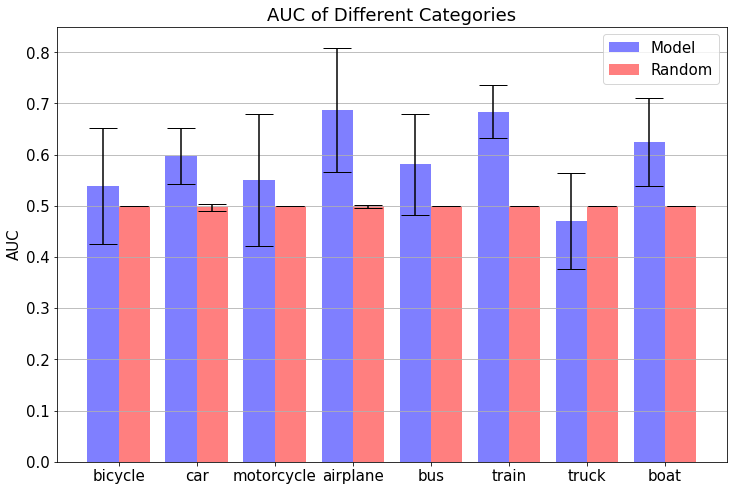

In [68]:
names = ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [69]:
ttest(names, categories, categories_rand)

bicycle :
t-statistic: 0.8929106457151735 p-value: 0.19349813380621433
car :
t-statistic: 4.775409643634016 p-value: 0.00014797007427710756
motorcycle :
t-statistic: 1.0422223205765662 p-value: 0.15748640174083986
airplane :
t-statistic: 4.088292757970279 p-value: 0.0005535824740137983
bus :
t-statistic: 2.170735306772926 p-value: 0.02381929765522327
train :
t-statistic: 9.48302233096483 p-value: 8.977452824551672e-08
truck :
t-statistic: -0.829666667054665 p-value: 0.2103247693532036
boat :
t-statistic: 3.850739142125043 p-value: 0.000882486547775723
Bonferroni:

Reject: [False  True False  True False  True False  True]
pvals corrected: [1.00000000e+00 1.18376059e-03 1.00000000e+00 4.42865979e-03
 1.90554381e-01 7.18196226e-07 1.00000000e+00 7.05989238e-03]
Benjamini/Hochberg:

Reject: [False  True False  True  True  True False  True]
pvals corrected: [2.10324769e-01 5.91880297e-04 2.09981869e-01 1.47621993e-03
 3.81108762e-02 7.18196226e-07 2.10324769e-01 1.76497310e-03]


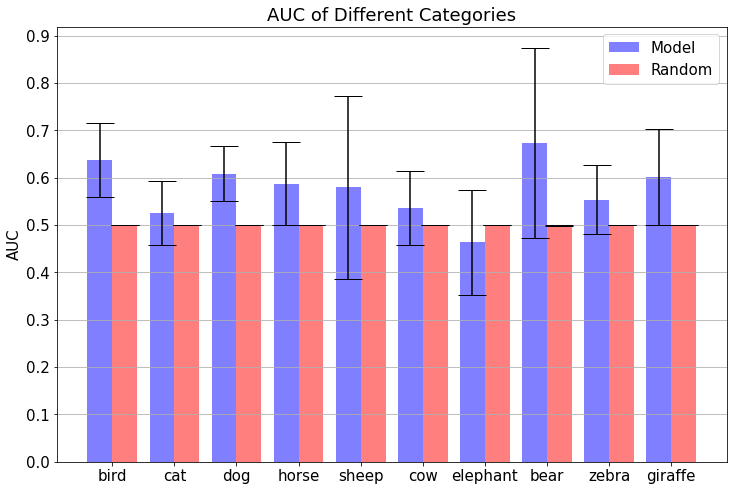

In [70]:
names = ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [71]:
ttest(names, categories, categories_rand)

bird :
t-statistic: 4.666084433258586 p-value: 0.00018190849691717233
cat :
t-statistic: 1.02488731377924 p-value: 0.16140002259975383
dog :
t-statistic: 4.899334640543494 p-value: 0.00011729381753957964
horse :
t-statistic: 2.679063201104188 p-value: 0.008989223304627621
sheep :
t-statistic: 1.092607220063934 p-value: 0.14650582146861635
cow :
t-statistic: 1.2050676589934883 p-value: 0.1240762339075682
elephant :
t-statistic: -0.8815126651377639 p-value: 0.19646171571266657
bear :
t-statistic: 2.2854708847648406 p-value: 0.019196354166812153
zebra :
t-statistic: 1.9302875064129705 p-value: 0.03704134067617734
giraffe :
t-statistic: 2.670732852930265 p-value: 0.009136854812700655
Bonferroni:

Reject: [ True False  True False False False False False False False]
pvals corrected: [0.00181908 1.         0.00117294 0.08989223 1.         1.
 1.         0.19196354 0.37041341 0.09136855]
Benjamini/Hochberg:

Reject: [ True False  True  True False False False  True False  True]
pvals corrected

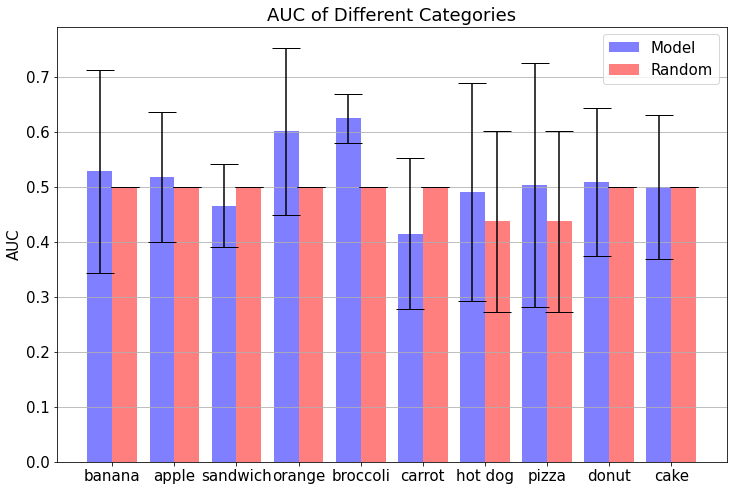

In [72]:
names = ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog','pizza', 'donut', 'cake']
categories, categories_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [73]:
ttest(names, categories, categories_rand)

banana :
t-statistic: 0.4147750080634775 p-value: 0.34229621302879343
apple :
t-statistic: 0.4154852809880957 p-value: 0.3420422697270106
sandwich :
t-statistic: -1.1721489361460624 p-value: 0.13034909784949503
orange :
t-statistic: 1.7680203084852648 p-value: 0.04941694152048663
broccoli :
t-statistic: 7.36763863068521 p-value: 1.76157257016933e-06
carrot :
t-statistic: -1.625752420614786 p-value: 0.06314673601659741
hot dog :
t-statistic: 0.5451069341776 p-value: 0.2971291035146757
pizza :
t-statistic: 0.6323357609506071 p-value: 0.26867918476086783
donut :
t-statistic: 0.18259533825919252 p-value: 0.42886663626368016
cake :
t-statistic: -0.0019700856522485376 p-value: 0.4992279486811389
Bonferroni:

Reject: [False False False False  True False False False False False]
pvals corrected: [1.00000000e+00 1.00000000e+00 1.00000000e+00 4.94169415e-01
 1.76157257e-05 6.31467360e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Benjamini/Hochberg:

Reject: [False False False

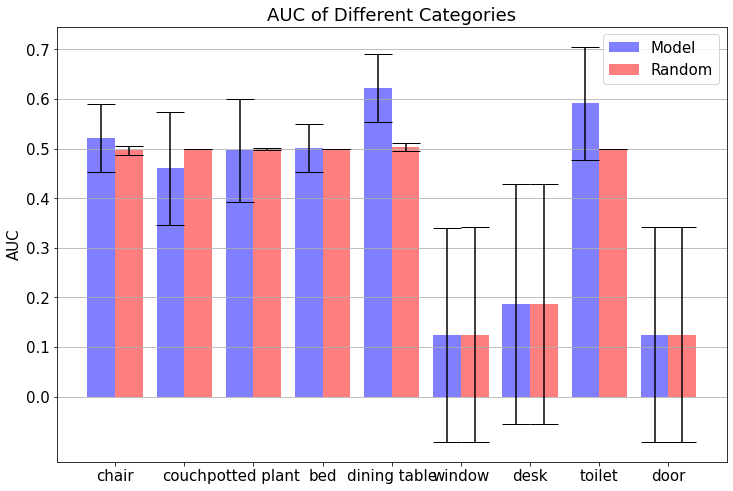

In [74]:
names = ['chair', 'couch', 'potted plant', 'bed', 'dining table', 'window', 'desk', 'toilet', 'door']
categories, categories_rand = furniture_fine, furniture_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [75]:
ttest(names, categories, categories_rand)

chair :
t-statistic: 0.9747428382231385 p-value: 0.17311513958643365
couch :
t-statistic: -0.9210263563832763 p-value: 0.18631789734360832
potted plant :
t-statistic: -0.05540099329307695 p-value: 0.4783009384663308
bed :
t-statistic: 0.07334267324429625 p-value: 0.471285507901027
dining table :
t-statistic: 4.552639751318402 p-value: 0.00022570888252317536
window :
t-statistic: -0.0074233735138391314 p-value: 0.4970909016670716
desk :
t-statistic: 0.0 p-value: 0.5
toilet :
t-statistic: 2.120055804476796 p-value: 0.026175705022954295
door :
t-statistic: 0.0 p-value: 0.5
Bonferroni:

Reject: [False False False False  True False False False False]
pvals corrected: [1.         1.         1.         1.         0.00203138 1.
 1.         0.23558135 1.        ]
Benjamini/Hochberg:

Reject: [False False False False  True False False False False]
pvals corrected: [0.41921527 0.41921527 0.5        0.5        0.00203138 0.5
 0.5        0.11779067 0.5       ]
